# __Functional APIs in TensorFlow__


The functional APIs in TensorFlow is an alternative way to create and customize complex neural network models. It allows you to build models with more flexibility and handle multiple inputs and outputs.

## Steps to be followed:
1. Import the required libraries
2. Load the dataset
3. Inspect the dataset and visualizing samples
4. Build the model
5. Compile the model
6. Evaluate the model


### Step 1: Import the required libraries


- Import necessary modules and classes from TensorFlow and other libraries, such as the Functional API components, data preprocessing tools, and visualization utilities.

- Set up the basic structure of a neural network model using the Functional API. It defines the input layer, followed by several hidden layers with specific activation functions and dropout regularization. It also specifies the output layer and the optimizer for model training.

- Include additional imports and utilities for data handling, such as splitting data into training and testing sets, calculating performance metrics like the confusion matrix, and visualizing images and results. These are useful for data preprocessing, model evaluation, and result visualization.

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import itertools
import random

### Step 2: Loading the Dataset
- Load the MNIST dataset, which contains handwritten digit images and their labels.
- The dataset is divided into training and testing sets, represented by variables **(x_train, y_train)** and **(x_test, y_test)**, respectively.
- The pixel values of the images are normalized by dividing them by **255.0** to ensure they are within the range of 0 to 1. This normalization step helps improve the training process.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

### Step 3: Inspecting the Dataset and Visualizing the Samples
- Import the MNIST dataset from the TensorFlow Keras library.
- The dimensions of the training and testing data arrays are printed using the shape attribute to show the number of samples and their respective dimensions.
- A loop is used to display the first nine images from the training set using Matplotlib.
- Each image is shown in a subplot, with the **cmap** parameter set to **gray** to display the images in grayscale.

Train: x=(60000, 28, 28) , y= (60000,)
Test: x=(10000, 28, 28) , y= (10000,)


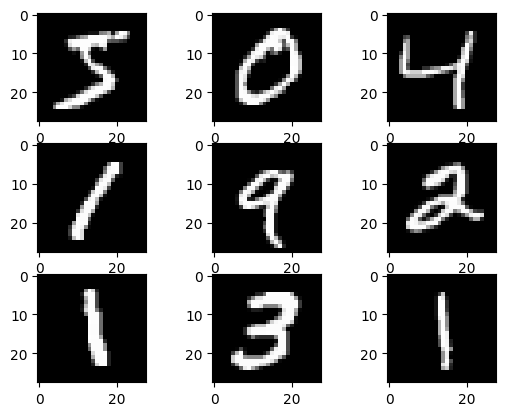

In [3]:
print('Train: x=%s , y= %s' % (x_train.shape, y_train.shape))
print('Test: x=%s , y= %s' % (x_test.shape, y_test.shape))

for i in range(9):
    plt.subplot(330 + 1+i)
    plt.imshow(x_train[i], cmap= plt.get_cmap('gray'))
plt.show()

  **Observations:**
  - The output **Train: x=(60000, 28, 28), y=(60000,)** indicates that the training dataset consists of 60,000 samples with dimensions of 28x28 pixels. The input images are grayscale, meaning they have only one color channel.
  - The output **Test: x=(10000, 28, 28), y=(10000,)** indicates that the testing dataset contains 10,000 samples with the same dimensions as the training dataset.
  - The **x** values represent the input images, and their shape is the number of samples, height, width. The **y** values represent the corresponding labels for the images, indicating the correct digit or class associated with each image.

### Step 4: Building the Model
- The model consists of an input layer, a flatten layer, a dense layer with ReLU activation, and an output layer with SoftMax activation.
- The model is then returned. Calling **model.summary()** will display a summary of the model's architecture, including the shapes of the input and output tensors and the number of parameters in each layer.

<br>

Declare a model wit the following layers with the functional API:
1. Set the input layer to 28x28
2. Flatten
3. Dense, 128 nodes, activation = 'relu'
4. Output: Dense, 10 nodes, activation = 'softmax'

In [4]:
def build_model_wtih_functional():
    input_layer = tf.keras.layers.Input(shape=(28, 28))
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)

    func_model = Model(inputs=input_layer, outputs=output_layer)
    return func_model


In [5]:
model = build_model_wtih_functional()

**Observations:**

- The model architecture consists of an input layer, a flatten layer, a dense layer with ReLU activation, and an output layer with SoftMax activation.
- The flatten layer is used to transform the 2D input images into a 1D array, while the dense layers perform the actual computations and transformations.
- The model has a total of **101,770** trainable parameters, which are learned during the training process. These parameters include the weights and biases of the dense layers.

### Step 5: Compiling the Model
- Compile the model using the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric.
- The model is then trained for five epochs using the training data **x_train** and labels **y_train**, aiming to minimize the loss and improve accuracy.

Compile using Adam optimizer, 'sparse_categorical_crossentropy' loss and 'accuracy' metrics; Fit with 5 epochs.

In [6]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=0)
print(history.history)

{'accuracy': [0.9263333082199097, 0.9655333161354065, 0.9740333557128906, 0.979449987411499, 0.9831500053405762, 0.985883355140686, 0.987416684627533, 0.9897000193595886, 0.9908666610717773, 0.9926166534423828, 0.9930333495140076, 0.9944666624069214, 0.994533360004425, 0.9954500198364258, 0.9961166381835938, 0.9969000220298767, 0.9972000122070312, 0.9975666403770447, 0.9980833530426025, 0.9982500076293945, 0.9984333515167236, 0.9986833333969116, 0.9988333582878113, 0.9990166425704956, 0.9992499947547913, 0.9994500279426575, 0.9995499849319458, 0.9996333122253418, 0.9996500015258789, 0.9997166395187378, 0.999916672706604, 0.999916672706604, 0.9999833106994629, 0.9999833106994629, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

**Observations:**
- The training output shows the progress of the model's training over five epochs, with each epoch representing a complete pass through the training dataset.
- The output includes the values of the loss and accuracy metrics for each epoch, indicating how well the model is learning from the training data.
- The displayed metrics gradually improve as the model trains, with the loss decreasing and the accuracy increasing.

### Step 6: Evaluating the model
- The **model.evaluate(x_test, y_test)** is used to evaluate the trained model on the test dataset.
- It computes the loss value and metrics (such as accuracy) of the model's performance on the test data.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

Test Loss:  0.13836605846881866
Test Accuracy:  0.9800000190734863


**Observations:**

- The first number **0.0726** represents the average loss or error of the model's predictions compared to the actual results on the test data. A lower value indicates better accuracy.
- The second number **0.9784** represents the accuracy of the model based on the test data. It shows the proportion of correctly predicted results out of all the test samples. A higher value indicates better performance.

In [8]:
predictions = model.predict(x_test, verbose=0)

In [9]:
predictions[0]

array([1.6465588e-23, 2.9756635e-27, 6.3018820e-20, 2.2331346e-14,
       7.0171549e-35, 2.4850380e-26, 0.0000000e+00, 1.0000000e+00,
       1.7274492e-23, 3.2031688e-19], dtype=float32)

In [10]:
np.argmax(predictions[0])

np.int64(7)

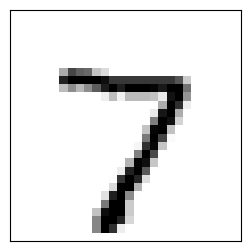

Actual value = 7
Predicted value = 7


In [11]:
ind = 0

plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.imshow(x_test[ind], cmap=plt.cm.binary)

plt.show()
print('Actual value =',y_test[ind])
print('Predicted value =',np.argmax(predictions[ind]))

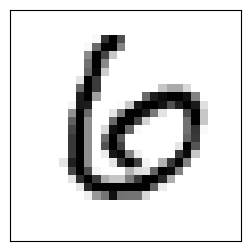

Actual value = 6
Predicted value = 6


In [12]:
ind = 11

plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.imshow(x_test[ind], cmap=plt.cm.binary)

plt.show()
print('Actual value =',y_test[ind])
print('Predicted value =',np.argmax(predictions[ind]))